In [ ]:
import numpy as nmp
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

In [115]:

nosPokemons = pd.read_csv("datas/pokedex.csv")
#Affichage des colonnes du Dataframe
print(nosPokemons.columns.values)
print(nosPokemons.head(10))

['NUMERO' 'NOM' 'TYPE_1' 'TYPE_2' 'POINTS_DE_VIE' 'NIVEAU_ATTAQUE'
 'NIVEAU_DEFENSE' 'NIVEAU_ATTAQUE_SPECIALE' 'NIVEAU_DEFENSE_SPECIALE'
 'VITESSE' 'NOMBRE_GENERATIONS' 'LEGENDAIRE']
   NUMERO               NOM TYPE_1  TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  \
0       1        Bulbizarre  Herbe  Poison             45              49   
1       2        Herbizarre  Herbe  Poison             60              62   
2       3        Florizarre  Herbe  Poison             80              82   
3       4   Mega Florizarre  Herbe  Poison             80             100   
4       5         Salameche    Feu     NaN             39              52   
5       6         Reptincel    Feu     NaN             58              64   
6       7         Dracaufeu    Feu     Vol             78              84   
7       8  Mega Dracaufeu X    Feu  Dragon             78             130   
8       9  Mega Dracaufeu Y    Feu     Vol             78             104   
9      10          Carapuce    Eau     NaN     

In [118]:
# remplacement de VRAI FAUX par 1 0
nosPokemonsClean = nosPokemons
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("VRAI", 1)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("FAUX", 0)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].astype(int)
print(nosPokemonsClean.head())

#Comptage du nombre d'observations et de features
print(nosPokemonsClean.shape)

#Informations sur notre jeu de données
print(nosPokemonsClean.info())


   NUMERO              NOM TYPE_1  TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  \
0       1       Bulbizarre  Herbe  Poison             45              49   
1       2       Herbizarre  Herbe  Poison             60              62   
2       3       Florizarre  Herbe  Poison             80              82   
3       4  Mega Florizarre  Herbe  Poison             80             100   
4       5        Salameche    Feu     NaN             39              52   

   NIVEAU_DEFENSE  NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE  VITESSE  \
0              49                       65                       65       45   
1              63                       80                       80       60   
2              83                      100                      100       80   
3             123                      122                      120       80   
4              43                       60                       50       65   

   NOMBRE_GENERATIONS  LEGENDAIRE  
0                   1     

In [119]:
# Rechercher l’observation dont le NOM est manquant
print(nosPokemonsClean[nosPokemonsClean['NOM'].isnull()])

# Afficher les noms aux lignes 61 et 63
print(nosPokemonsClean['NOM'][61])
print(nosPokemonsClean['NOM'][63])

# Renseigner la valeur manquante
nosPokemonsClean['NOM'][62] = "Colossinge"

# Vérifier
print(nosPokemonsClean['NOM'][62])

    NUMERO  NOM  TYPE_1 TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  NIVEAU_DEFENSE  \
62      63  NaN  Combat    NaN             65             105              60   

    NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE  VITESSE  \
62                       60                       70       95   

    NOMBRE_GENERATIONS  LEGENDAIRE  
62                   1           0  
Ferosinge
Caninos
Colossinge


/tmp/ipykernel_2544/3434421551.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nosPokemonsClean['NOM'][62] = "Colossinge"
/tmp/ipykernel_2544/3434421551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [120]:
#Chargement des données des combats
combats = pd.read_csv("datas/combats.csv")

#Affichage des colonnes du Dataframe
print(combats.columns.values)

#Affichage des 10 premières lignes du Dataframe
print(combats.head(10))

#Comptage du nombre de lignes et de colonnes
print (combats.shape)

#Informations sur notre jeu de données
print (combats.info())

['Premier_Pokemon' 'Second_Pokemon' 'Pokemon_Gagnant']
   Premier_Pokemon  Second_Pokemon  Pokemon_Gagnant
0              266             298              298
1              702             701              701
2              191             668              668
3              237             683              683
4              151             231              151
5              657             752              657
6              192             134              134
7               73             545              545
8              220             763              763
9              302              31               31
(50000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  50000 non-null  int64
 1   Second_Pokemon   50000 non-null  int64
 2   Pokemon_Gagnant  50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1

In [121]:
nbFoisPremierePosition = combats.groupby('Premier_Pokemon').count()
print(nbFoisPremierePosition)

nbFoisSecondePosition = combats.groupby('Second_Pokemon').count()
print(nbFoisSecondePosition)

nombreTotalDeCombats = nbFoisPremierePosition + nbFoisSecondePosition
print(nombreTotalDeCombats)


                 Second_Pokemon  Pokemon_Gagnant
Premier_Pokemon                                 
1                            70               70
2                            55               55
3                            68               68
4                            62               62
5                            50               50
...                         ...              ...
796                          49               49
797                          64               64
798                          60               60
799                          75               75
800                          61               61

[784 rows x 2 columns]
                Premier_Pokemon  Pokemon_Gagnant
Second_Pokemon                                  
1                            63               63
2                            66               66
3                            64               64
4                            63               63
5                            62              

In [122]:
nombreDeVictoires = combats.groupby('Pokemon_Gagnant').count()
print(nombreDeVictoires)


                 Premier_Pokemon  Second_Pokemon
Pokemon_Gagnant                                 
1                             37              37
2                             46              46
3                             89              89
4                             70              70
5                             55              55
...                          ...             ...
796                           39              39
797                          116             116
798                           60              60
799                           89              89
800                           75              75

[783 rows x 2 columns]


In [123]:
listeAAgreger = combats.groupby('Pokemon_Gagnant').count()
listeAAgreger.sort_index()

#On ajoute le nombre de combats
listeAAgreger['NBR_COMBATS'] = nbFoisPremierePosition.Pokemon_Gagnant + nbFoisSecondePosition.Pokemon_Gagnant

#On ajoute le nombre de victoires
listeAAgreger['NBR_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon

#On calcule le pourcentage de victoires
listeAAgreger['POURCENTAGE_DE_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon / (nbFoisPremierePosition.Pokemon_Gagnant + nbFoisSecondePosition.Pokemon_Gagnant)

#On affiche la nouvelle liste
print(listeAAgreger)


                 Premier_Pokemon  Second_Pokemon  NBR_COMBATS  NBR_VICTOIRES  \
Pokemon_Gagnant                                                                
1                             37              37          133             37   
2                             46              46          121             46   
3                             89              89          132             89   
4                             70              70          125             70   
5                             55              55          112             55   
...                          ...             ...          ...            ...   
796                           39              39          105             39   
797                          116             116          131            116   
798                           60              60          119             60   
799                           89              89          144             89   
800                           75        

In [ ]:
nouveauPokedex = nosPokemonsClean.merge(listeAAgreger, left_on='NUMERO', right_index = True, how='left')
print(nouveauPokedex.describe())

         NUMERO  POINTS_DE_VIE  NIVEAU_ATTAQUE  NIVEAU_DEFENSE  \
count  800.0000     800.000000      800.000000      800.000000   
mean   400.5000      69.258750       79.001250       73.842500   
std    231.0844      25.534669       32.457366       31.183501   
min      1.0000       1.000000        5.000000        5.000000   
25%    200.7500      50.000000       55.000000       50.000000   
50%    400.5000      65.000000       75.000000       70.000000   
75%    600.2500      80.000000      100.000000       90.000000   
max    800.0000     255.000000      190.000000      230.000000   

       NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE     VITESSE  \
count               800.000000               800.000000  800.000000   
mean                 72.820000                71.902500   68.277500   
std                  32.722294                27.828916   29.060474   
min                  10.000000                20.000000    5.000000   
25%                  49.750000                50.0

In [125]:
print(nouveauPokedex.describe())


         NUMERO  POINTS_DE_VIE  NIVEAU_ATTAQUE  NIVEAU_DEFENSE  \
count  800.0000     800.000000      800.000000      800.000000   
mean   400.5000      69.258750       79.001250       73.842500   
std    231.0844      25.534669       32.457366       31.183501   
min      1.0000       1.000000        5.000000        5.000000   
25%    200.7500      50.000000       55.000000       50.000000   
50%    400.5000      65.000000       75.000000       70.000000   
75%    600.2500      80.000000      100.000000       90.000000   
max    800.0000     255.000000      190.000000      230.000000   

       NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE     VITESSE  \
count               800.000000               800.000000  800.000000   
mean                 72.820000                71.902500   68.277500   
std                  32.722294                27.828916   29.060474   
min                  10.000000                20.000000    5.000000   
25%                  49.750000                50.0

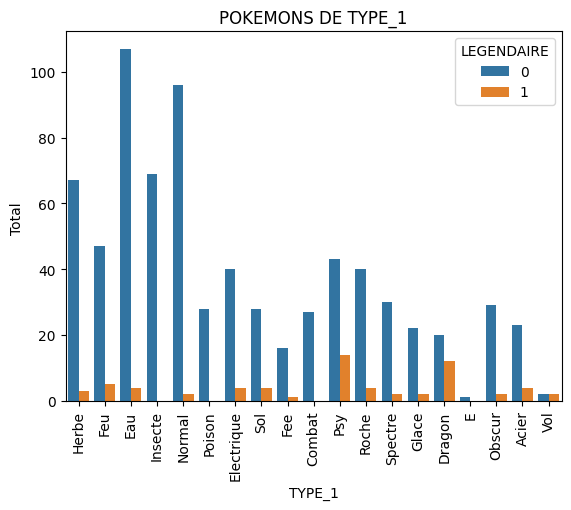

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

axe_X = sns.countplot(x="TYPE_1", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_1')
plt.ylabel('Total ')
plt.title("POKEMONS DE TYPE_1")
plt.show()